# Feature Importance Analysis for prediction of WPM using minimal attributes

### Preprocessing the dataset

In [1]:
# data acquisition
import gdown
folder_id = "1G7YDTrD_UNCUFiOs5ed4JV1QtRXaAEU0"
output = "datasets"
gdown.download_folder(f"https://drive.google.com/drive/folders/{folder_id}", output=output, quiet=False, use_cookies=False)

Retrieving folder contents


Processing file 1DAPRaVIVUmJME2LHfNfwwveB4mk5VOPx Subject_A_Results.csv
Processing file 1hf-mQ-rTuKlFlkMd8Nld77s8HbMs01NV Subject_B_Results.csv
Processing file 1zOQNeWfoew5LoT2AbSHqXlpRVYfiNKYg Subject_C_Results.csv
Processing file 18gvXYZ15sfvGkPIJTYb3FLwwTAdvesCr Subject_D_Results.csv
Processing file 19R_ckXXDHpanEX04UqNfwlA90jFxPaDR Subject_E_Results.csv
Processing file 1o2fkODEhX_4ObhHX1ghVAgk390BvCYoD Subject_F_Results.csv
Processing file 1tSKEy03Tcjiw9iJjpxH03plDjZRsgZZh Subject_G_Results.csv
Processing file 18NMwG0OHknGMDfFczZ5xntwFGEee_rcj Subject_H_Results.csv
Processing file 16uSR_2cqPTtCyUklqqttsNPZvrzads-k Subject_I_Results.csv
Processing file 1BnJ8m-YIVU_D7rXj46F4oLn1PMeXrOP1 Subject_J_Results.csv
Processing file 1RjLMAKuzuYk4E32wY6MvqP21WnmuKkVn Subject_K_Results.csv
Processing file 16PBRPMRWzpVjBJxs78zK5iaQ-Dc_vsjF Subject_L_Results.csv
Processing file 1JRc1mz1ODZeURfQGaMXdLkv9F73vKZ1z Subject_M_Results.csv
Processing file 1Aib17o9nXQAYNWiDwo-E0wd_NBvnOl9U Subject_N_Resu

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1DAPRaVIVUmJME2LHfNfwwveB4mk5VOPx
To: /content/datasets/Subject_A_Results.csv
100%|██████████| 67.6k/67.6k [00:00<00:00, 16.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hf-mQ-rTuKlFlkMd8Nld77s8HbMs01NV
To: /content/datasets/Subject_B_Results.csv
100%|██████████| 152k/152k [00:00<00:00, 60.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zOQNeWfoew5LoT2AbSHqXlpRVYfiNKYg
To: /content/datasets/Subject_C_Results.csv
100%|██████████| 147k/147k [00:00<00:00, 42.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=18gvXYZ15sfvGkPIJTYb3FLwwTAdvesCr
To: /content/datasets/Subject_D_Results.csv
100%|██████████| 155k/155k [00:00<00:00, 49.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=19R_ckXXDHpanEX04UqNfwlA90jFxPaDR
To: /content/datasets/Subject_E_Results.csv
100%|██████████| 157k/157k [00:00<00:00

['datasets/Subject_A_Results.csv',
 'datasets/Subject_B_Results.csv',
 'datasets/Subject_C_Results.csv',
 'datasets/Subject_D_Results.csv',
 'datasets/Subject_E_Results.csv',
 'datasets/Subject_F_Results.csv',
 'datasets/Subject_G_Results.csv',
 'datasets/Subject_H_Results.csv',
 'datasets/Subject_I_Results.csv',
 'datasets/Subject_J_Results.csv',
 'datasets/Subject_K_Results.csv',
 'datasets/Subject_L_Results.csv',
 'datasets/Subject_M_Results.csv',
 'datasets/Subject_N_Results.csv',
 'datasets/Subject_O_Results.csv',
 'datasets/Subject_P_Results.csv',
 'datasets/Subject_Q_Results.csv',
 'datasets/Subject_R_Results.csv',
 'datasets/Subject_S_Results.csv',
 'datasets/Subject_T_Results.csv',
 'datasets/Subject_U_Results.csv',
 'datasets/Subject_V_Results.csv']

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

folder_path = "datasets"

csv_files = glob.glob(f"{folder_path}/*.csv")

combined_data = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)

In [3]:
# previewing the data
def preview_data_details(data):
  print(f"Dimension of the data : {data.shape}\n")
  print(data.info())
  print(data.columns)

preview_data_details(combined_data)

Dimension of the data : (15003, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15003 entries, 0 to 15002
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    15003 non-null  object 
 1   isPb                   1575 non-null   object 
 2   wpm                    15003 non-null  float64
 3   acc                    15003 non-null  float64
 4   rawWpm                 15003 non-null  float64
 5   consistency            15003 non-null  float64
 6   charStats              15003 non-null  object 
 7   mode                   15003 non-null  object 
 8   mode2                  15003 non-null  object 
 9   quoteLength            14981 non-null  float64
 10  restartCount           15003 non-null  int64  
 11  testDuration           15003 non-null  float64
 12  afkDuration            15003 non-null  int64  
 13  incompleteTestSeconds  15003 non-null  float64
 14  punctuation      

In [4]:
# Drop irrelevant or mostly empty columns for clarity in analysis
columns_to_drop = ['_id', 'isPb', 'charStats', 'tags', 'timestamp', 'rawWpm'] # clearly irrelevant from the speed prediction pov
filtered_data = combined_data.drop(columns=columns_to_drop)

In [5]:
for column in filtered_data.columns:
  print(f"Column Name - {column}")
  print(f"Unique Values - {filtered_data[column].nunique()}\n")

Column Name - wpm
Unique Values - 8011

Column Name - acc
Unique Values - 1792

Column Name - consistency
Unique Values - 4428

Column Name - mode
Unique Values - 5

Column Name - mode2
Unique Values - 1211

Column Name - quoteLength
Unique Values - 5

Column Name - restartCount
Unique Values - 176

Column Name - testDuration
Unique Values - 3474

Column Name - afkDuration
Unique Values - 45

Column Name - incompleteTestSeconds
Unique Values - 4213

Column Name - punctuation
Unique Values - 2

Column Name - numbers
Unique Values - 2

Column Name - language
Unique Values - 42

Column Name - funbox
Unique Values - 27

Column Name - difficulty
Unique Values - 3

Column Name - lazyMode
Unique Values - 2

Column Name - blindMode
Unique Values - 2

Column Name - bailedOut
Unique Values - 2



In [10]:
print(filtered_data['difficulty'].unique())

['normal' 'master' 'expert']


In [11]:
for language in filtered_data['language'].unique() :
  print(f"{language} : {(filtered_data['language'] == language).sum()}")

english : 13482
swedish : 43
icelandic_1k : 4
swedish_diacritics : 2
german : 16
malay : 2
english_1k : 314
code_python : 42
lorem_ipsum : 1
norwegian_nynorsk_400k : 4
english_10k : 151
english_commonly_misspelled : 68
english_450k : 192
pig_latin : 1
latin : 30
english_5k : 213
english_shakespearean : 68
english_doubleletter : 121
english_25k : 80
wordle : 20
typing_of_the_dead : 4
code_vim : 8
code_python_5k : 1
english_contractions : 34
indonesian_1k : 15
indonesian : 9
code_rust : 8
catalan_1k : 1
english_old : 4
french : 5
filipino : 9
spanish : 9
code_arduino : 9
code_c++ : 2
albanian : 2
code_css : 20
code_assembly : 4
code_haskell : 1
toki_pona : 1
wordle_1k : 1
twitch_emotes : 1
hinglish : 1


In [12]:
print((filtered_data['difficulty'] == 'master').sum())
print((filtered_data['difficulty'] == 'expert').sum())
print((filtered_data['punctuation'] == True).sum())
print((filtered_data['numbers'] == True).sum())
print((filtered_data['blindMode'] == True).sum())
print((filtered_data['lazyMode']==True).sum())
print((filtered_data['bailedOut']==True).sum())

28
113
391
53
150
54
1


In [13]:
english_variants = [
    'english', 'english_1k', 'english_5k', 'english_10k', 'english_25k',
    'english_450k', 'english_commonly_misspelled', 'english_doubleletter',
    'english_old', 'english_shakespearean', 'english_contractions'
]

In [14]:
# clearly the feature values analysed above shall add an unwanted and insignificant variability in the data
# Hence, removing such columns

remaining_data = filtered_data[
    ~(
        (combined_data['difficulty'] == 'master') |
        (combined_data['difficulty'] == 'expert') |
        (combined_data['punctuation'] == True) |
        (combined_data['numbers'] == True) |
        (combined_data['blindMode'] == True) |
        (combined_data['lazyMode'] == True) |
        (combined_data['funbox'] != 'none') |
        (combined_data['bailedOut'] == True) |
        (~combined_data['language'].isin(english_variants))
    )
]

remaining_data = remaining_data.reset_index(drop=True)

print(f"Shape after filtering: {remaining_data.shape}")

Shape after filtering: (13825, 18)


In [15]:
other_columns_to_remove = ['difficulty', 'punctuation', 'numbers', 'blindMode', 'lazyMode', 'language', 'funbox', 'bailedOut', 'incompleteTestSeconds']

relevant_data = remaining_data.drop(columns=other_columns_to_remove)

print(f"Shape after removing columns: {relevant_data.shape}")
relevant_data.head()

Shape after removing columns: (13825, 9)


,wpm,acc,consistency,mode,mode2,quoteLength,restartCount,testDuration,afkDuration
0,60.40,93.62,72.05,time,60,-1.0,9,60.00,0
1,57.00,92.36,64.88,time,60,-1.0,5,60.00,0
2,59.79,93.41,68.31,time,60,-1.0,3,60.01,0
3,66.00,95.44,69.77,time,60,-1.0,1,60.00,0
4,66.80,95.43,73.23,time,60,-1.0,0,60.00,0


In [16]:
final_data = relevant_data[
    ~(
        (relevant_data['mode'] == 'zen') |
        (relevant_data['mode'] == 'custom') |
        (relevant_data['mode'] == 'quote')
    )
]

# Reset the index of the resulting DataFrame
final_data = final_data.reset_index(drop=True)

print(f"Shape after filtering: {final_data.shape}")

Shape after filtering: (12165, 9)


In [17]:
# most tests have afkDuration not equal to zero or <= 3 seconds
# hence it is suitable to drop such a column
column_to_remove = ['afkDuration','quoteLength']

# Remove the columns
final_data = final_data.drop(columns=column_to_remove)

print(f"Shape after removing columns: {final_data.shape}")
final_data.head()

Shape after removing columns: (12165, 7)


,wpm,acc,consistency,mode,mode2,restartCount,testDuration
0,60.40,93.62,72.05,time,60,9,60.00
1,57.00,92.36,64.88,time,60,5,60.00
2,59.79,93.41,68.31,time,60,3,60.01
3,66.00,95.44,69.77,time,60,1,60.00
4,66.80,95.43,73.23,time,60,0,60.00


In [18]:
final_data['mode2'] = final_data['mode2'].astype(int)
unique_combinations = final_data.groupby(['mode', 'mode2']).size().reset_index(name='count')
# Print the unique combinations along with their counts
unique_combinations

,mode,mode2,count
0,time,15,2104
1,time,17,2
2,time,30,1786
3,time,60,2723
4,time,120,246
5,time,180,8
6,time,250,1
7,time,300,20
8,time,600,5
9,time,900,4


In [19]:
# List of mode, mode2 combinations to drop that add unwanted variability and a sparse dataset when one-hot-encoded
combinations_to_drop = [
    ('time', 17), ('time', 120), ('time', 180), ('time', 250), ('time', 300), ('time', 600), ('time', 900),
    ('time', 3600), ('words', 11), ('words', 15), ('words', 90),
    ('words', 150), ('words', 100), ('words', 900), ('words',50), ('words', 250)
]
print(f"Original data size: {final_data.shape}")

combinations_to_drop_set = set(combinations_to_drop)

final_data = final_data[
    ~final_data.apply(lambda row: (row['mode'], row['mode2']) in combinations_to_drop_set, axis=1)
]

print(f"Filtered data size: {final_data.shape}")

Original data size: (12165, 7)
Filtered data size: (11310, 7)


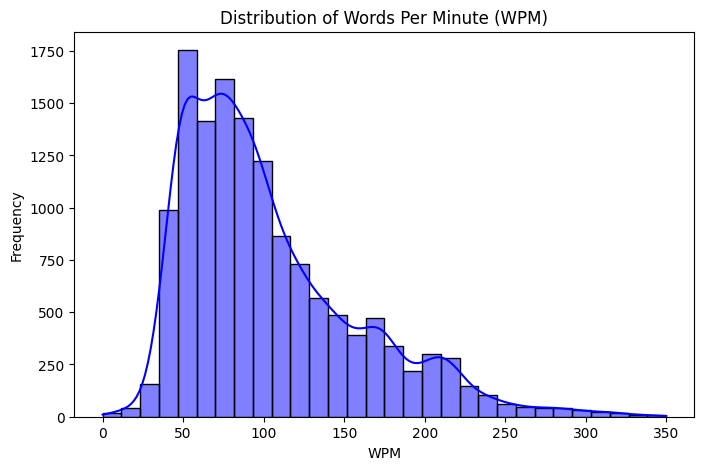

In [20]:
# Plot of WPM distribution
plt.figure(figsize=(8, 5))
sns.histplot(relevant_data['wpm'], kde=True, bins=30, color='blue')
plt.title("Distribution of Words Per Minute (WPM)")
plt.xlabel("WPM")
plt.ylabel("Frequency")
plt.show()

In [21]:
final_data['mode_combined'] = final_data['mode'] + '_' + final_data['mode2'].astype(str)
# Applying one-hot encoding to the combined mode feature
final_data = pd.get_dummies(final_data, columns=['mode_combined'])

In [22]:
column_to_remove = ['mode', 'mode2']
# Remove the columns
final_data = final_data.drop(columns=column_to_remove)

print(f"Shape after removing columns: {final_data.shape}")
final_data.head()

Shape after removing columns: (11310, 10)


,wpm,acc,consistency,restartCount,testDuration,mode_combined_time_15,mode_combined_time_30,mode_combined_time_60,mode_combined_words_10,mode_combined_words_25
0,60.40,93.62,72.05,9,60.00,False,False,True,False,False
1,57.00,92.36,64.88,5,60.00,False,False,True,False,False
2,59.79,93.41,68.31,3,60.01,False,False,True,False,False
3,66.00,95.44,69.77,1,60.00,False,False,True,False,False
4,66.80,95.43,73.23,0,60.00,False,False,True,False,False


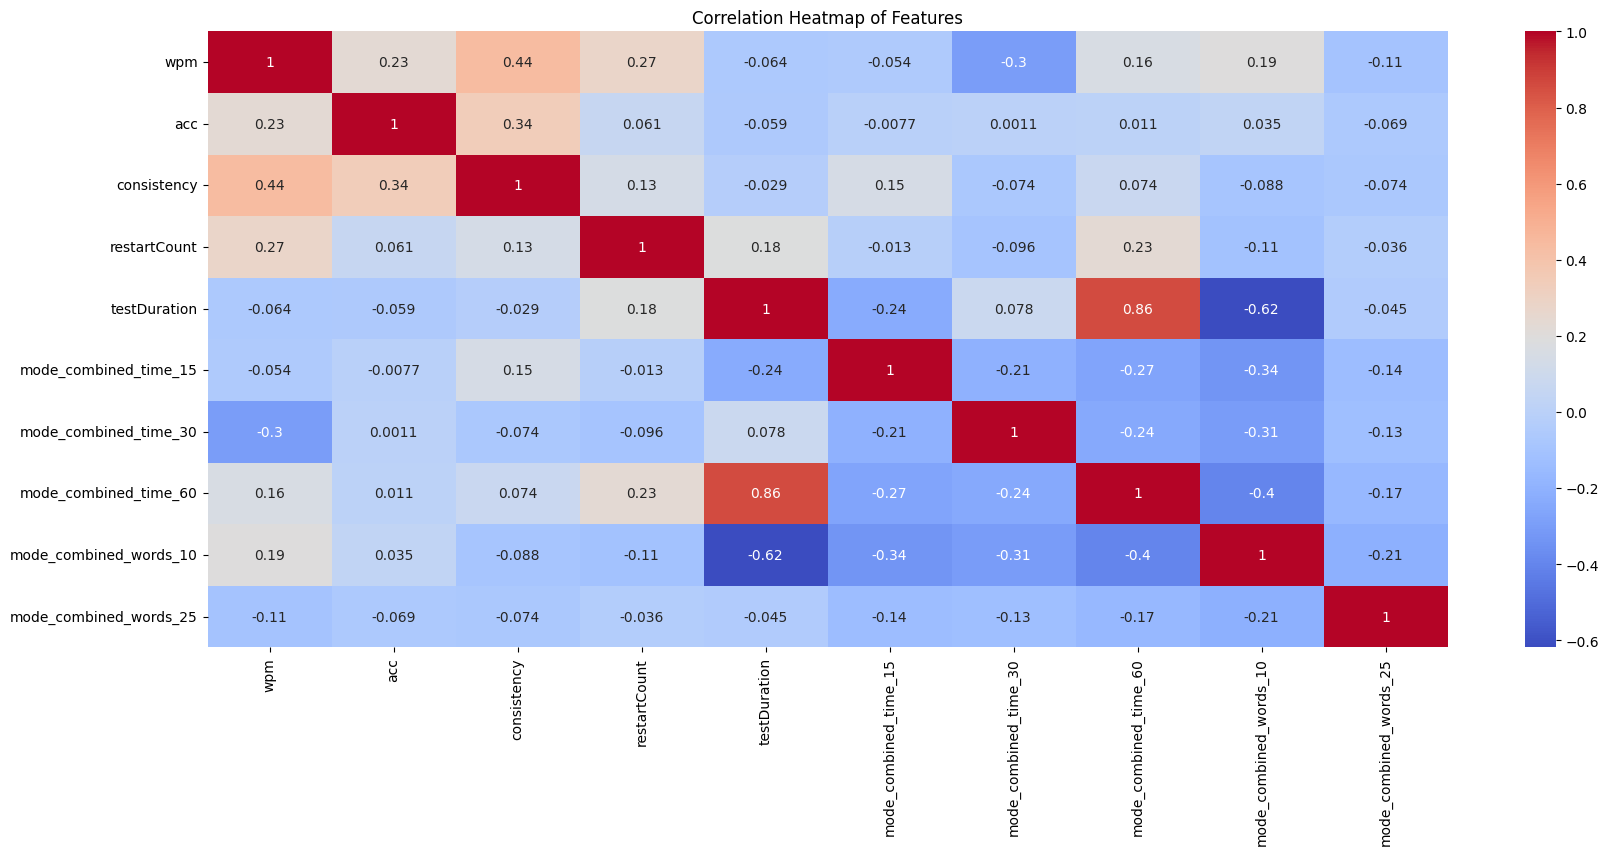

In [23]:
# correlation between numerical features
correlation_matrix = final_data.corr()

# Visualizing the correlation heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

### Evaluation of baseline models

In [36]:
X = final_data.drop(columns=['wpm'])
y = final_data['wpm']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

In [28]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)

In [29]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_test, predictions):
    print("MAE:", mean_absolute_error(y_test, predictions))
    print("MSE:", mean_squared_error(y_test, predictions))
    print("R2 Score:", r2_score(y_test, predictions))

print(">>>>>>>>>>>Evaluating Linear Regression model<<<<<<<<<<<<<")
evaluate_model(y_test, lr_predictions)

print(">>>>>>>>>>>Evaluating Random Forest model<<<<<<<<<<<<<")
evaluate_model(y_test, rf_predictions)

print(">>>>>>>>>>>Evaluating Decision Tree model<<<<<<<<<<<<<")
evaluate_model(y_test, dt_predictions)

print(">>>>>>>>>>>Evaluating XGBoost model<<<<<<<<<<<<<")
evaluate_model(y_test, xgb_predictions)

>>>>>>>>>>>Evaluating Linear Regression model<<<<<<<<<<<<<
MAE: 32.22970685437735
MSE: 1899.706905877986
R2 Score: 0.3981987233907768
>>>>>>>>>>>Evaluating Random Forest model<<<<<<<<<<<<<
MAE: 12.977567626836766
MSE: 433.7010721701118
R2 Score: 0.8626094066978531
>>>>>>>>>>>Evaluating Decision Tree model<<<<<<<<<<<<<
MAE: 17.41412687886826
MSE: 786.3706549182139
R2 Score: 0.7508884857166449
>>>>>>>>>>>Evaluating XGBoost model<<<<<<<<<<<<<
MAE: 13.405909662187678
MSE: 446.4729997412322
R2 Score: 0.8585634339779148


In [31]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
ada.fit(X_train, y_train)
evaluate_model(y_test, ada.predict(X_test))

MAE: 25.713434416028612
MSE: 976.8982787764966
R2 Score: 0.6905319291802332


In [32]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


In [33]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_state=42)
catboost.fit(X_train, y_train)
evaluate_model(y_test, catboost.predict(X_test))

MAE: 13.087540384971383
MSE: 403.98263583149435
R2 Score: 0.8720238026091762


### Hyperparameter tuning using grid search

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f">>>>>>>>>>>Evaluating {model_name}<<<<<<<<<<<<<")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")
    print("\n")

# GridSearchCV for hyperparameter tuning
def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"Best Parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    return grid_search.best_estimator_

# Models and hyperparameters to tune
models_and_params = {
    "GradientBoostingRegressor": (GradientBoostingRegressor(), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }),
    "ElasticNet": (ElasticNet(), {
        'alpha': [0.01, 0.1, 1, 10],
        'l1_ratio': [0.1, 0.5, 0.9]
    })
}

for model_name, (model, param_grid) in models_and_params.items():
    print(f"Starting Grid Search for {model_name}")
    best_model = perform_grid_search(model, param_grid, X_train, y_train)
    evaluate_model(best_model, X_test, y_test, model_name)

# Feature importance for GradientBoostingRegressor
best_gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
best_gbr.fit(X_train, y_train)
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_gbr.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances for GradientBoostingRegressor:")
print(feature_importances)


Starting Grid Search for GradientBoostingRegressor
Best Parameters for GradientBoostingRegressor: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
>>>>>>>>>>>Evaluating GradientBoostingRegressor<<<<<<<<<<<<<
MAE: 12.919219939945878
MSE: 412.9704459986438
R2 Score: 0.8691765867487843


Starting Grid Search for ElasticNet
Best Parameters for ElasticNet: {'alpha': 0.1, 'l1_ratio': 0.5}
>>>>>>>>>>>Evaluating ElasticNet<<<<<<<<<<<<<
MAE: 32.72501261708004
MSE: 1921.8826871841557
R2 Score: 0.3911737378740283



Feature Importances for GradientBoostingRegressor:
                  Feature  Importance
3            testDuration    0.418095
1             consistency    0.373299
2            restartCount    0.085741
0                     acc    0.051367
6   mode_combined_time_60    0.037426
7  mode_combined_words_10    0.015274
8  mode_combined_words_25    0.010486
4   mode_combined_time_15    0.006004
5   mode_combined_time_30    0.002308


In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f">>>>>>>>>>>Evaluating {model_name}<<<<<<<<<<<<<")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")
    print("\n")
    return mae, mse, r2

# Function for Grid Search
def perform_grid_search(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    print(f"Best Parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    return grid_search.best_estimator_

# models and parameter grids
models_and_params = {
    "Ridge": (Ridge(), {
        'alpha': [0.05, 0.1, 1.0, 10]
    }),
    "ExtraTreesRegressor": (ExtraTreesRegressor(random_state=42), {
        'n_estimators': [100, 150, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }),
    "CatBoostRegressor": (CatBoostRegressor(verbose=0, random_state=42), {
        'iterations': [100, 200],
        'learning_rate': [0.05, 0.1, 0.01],
        'depth': [6, 8]
    })
}

results = []
for model_name, (model, param_grid) in models_and_params.items():
    print(f"Starting Grid Search for {model_name}")
    best_model = perform_grid_search(model, param_grid, X_train, y_train)
    mae, mse, r2 = evaluate_model(best_model, X_test, y_test, model_name)
    results.append((model_name, mae, mse, r2))

# Display results in a DataFrame
results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "R2"])
print("\nGrid Search Results:")
print(results_df)

# Save results to a CSV file for further analysis (optional)
results_df.to_csv("model_results.csv", index=False)

Starting Grid Search for Ridge
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters for Ridge: {'alpha': 10}
>>>>>>>>>>>Evaluating Ridge<<<<<<<<<<<<<
MAE: 32.24319013232935
MSE: 1899.7888303726563
R2 Score: 0.39817277082655445


Starting Grid Search for ExtraTreesRegressor
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters for ExtraTreesRegressor: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
>>>>>>>>>>>Evaluating ExtraTreesRegressor<<<<<<<<<<<<<
MAE: 12.626490290601735
MSE: 410.11499294121813
R2 Score: 0.8700811553903676


Starting Grid Search for CatBoostRegressor
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for CatBoostRegressor: {'depth': 8, 'iterations': 200, 'learning_rate': 0.1}
>>>>>>>>>>>Evaluating CatBoostRegressor<<<<<<<<<<<<<
MAE: 12.853617921141044
MSE: 404.0528548494948
R2 Score: 0.8720015581805519



Grid Search Results:
                 Model        

In [39]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f">>>>>>>>>>>Evaluating {model_name}<<<<<<<<<<<<<")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")
    print("\n")
    return mae, mse, r2

# Define base models
base_models = [
    ('extratrees', ExtraTreesRegressor(max_depth=20, min_samples_split=5, min_samples_leaf=1, n_estimators=200)),
    ('catboost', CatBoostRegressor(depth=8, iterations=200, learning_rate=0.1, verbose=0)),
    ('gradientboost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=42))
]

# Meta-model (Ridge for regression stacking)
stacking_model = StackingRegressor(estimators=base_models, final_estimator=Ridge(alpha=10))

stacking_model.fit(X_train, y_train)

evaluate_model(stacking_model, X_test, y_test, model_name="Stacking Regressor")


>>>>>>>>>>>Evaluating Stacking Regressor<<<<<<<<<<<<<
MAE: 12.49175536986332
MSE: 394.095024421734
R2 Score: 0.8751560632492772




(12.49175536986332, 394.095024421734, 0.8751560632492772)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


227/227 - 5s - 20ms/step - loss: 12974.1055 - mae: 103.1406 - val_loss: 12518.4180 - val_mae: 102.6938
Epoch 2/100
227/227 - 1s - 4ms/step - loss: 9562.9551 - mae: 90.9108 - val_loss: 8667.7939 - val_mae: 87.4232
Epoch 3/100
227/227 - 1s - 5ms/step - loss: 5928.8145 - mae: 70.4758 - val_loss: 4445.5117 - val_mae: 60.7562
Epoch 4/100
227/227 - 1s - 4ms/step - loss: 2972.1946 - mae: 46.6047 - val_loss: 2169.8396 - val_mae: 38.1425
Epoch 5/100
227/227 - 1s - 4ms/step - loss: 1415.9758 - mae: 28.7372 - val_loss: 946.1595 - val_mae: 20.7764
Epoch 6/100
227/227 - 1s - 5ms/step - loss: 929.0624 - mae: 22.0119 - val_loss: 1004.3750 - val_mae: 21.1003
Epoch 7/100
227/227 - 2s - 7ms/step - loss: 870.6575 - mae: 21.3432 - val_loss: 601.8871 - val_mae: 16.5123
Epoch 8/100
227/227 - 2s - 9ms/step - loss: 834.1608 - mae: 20.8586 - val_loss: 599.0494 - val_mae: 16.7179
Epoch 9/100
227/227 - 1s - 5ms/step - loss: 816.5320 - mae: 20.7596 - val_loss: 594.7959 - val_mae: 16.8049
Epoch 10/100
227/227 - 1s

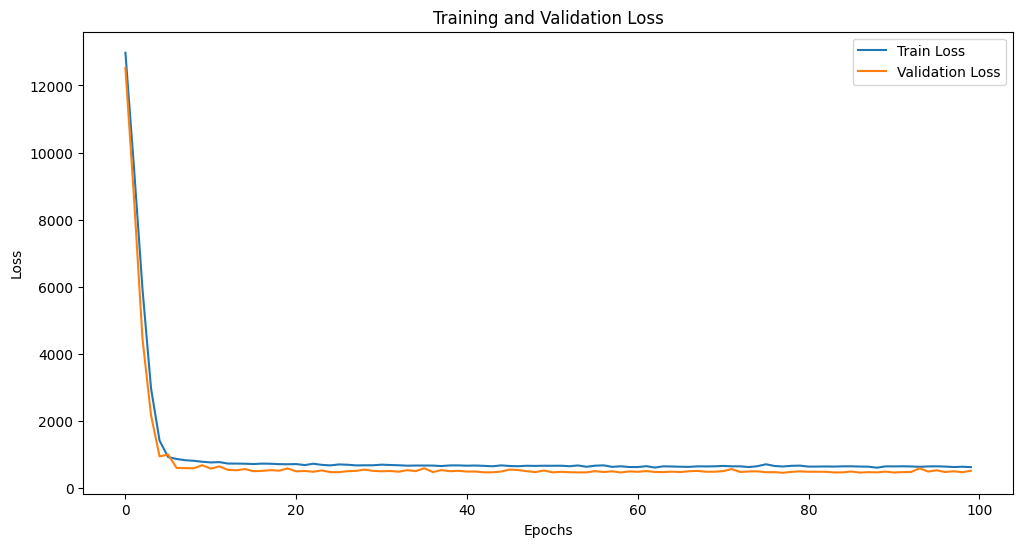

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Neural network architecture
def build_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.2),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(1, activation='linear')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

X_train_scaled = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)  # Standardize features
X_test_scaled = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0)

input_dim = X_train_scaled.shape[1]
model = build_model(input_dim)

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=2
)

y_pred = model.predict(X_test_scaled).flatten()
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [41]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Step 1: Feature Engineering
def preprocess_features(X):
    # Polynomial Features
    poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
    X_poly = poly.fit_transform(X)

    # Standard Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_poly)

    return X_scaled, scaler, poly

# Preprocess training and testing data
X_train_processed, scaler, poly = preprocess_features(X_train)
X_test_processed = scaler.transform(poly.transform(X_test))

# Step 2: Neural Network Architecture
def build_advanced_model(input_dim):
    inputs = Input(shape=(input_dim,))

    # First block
    x = Dense(128, activation='relu', kernel_regularizer='l2')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Second block
    x = Dense(256, activation='relu', kernel_regularizer='l2')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    # Residual connection block
    residual = Dense(128, activation='relu', kernel_regularizer='l2')(x)
    residual = BatchNormalization()(residual)
    x = concatenate([x, residual])  # Residual connection
    x = Dropout(0.3)(x)

    # Third block
    x = Dense(128, activation='relu', kernel_regularizer='l2')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Output layer
    outputs = Dense(1, activation='linear')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mae'])
    return model

# Build the model
input_dim = X_train_processed.shape[1]
model = build_advanced_model(input_dim)

# Step 3: Training the Model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

history = model.fit(
    X_train_processed, y_train,
    validation_data=(X_test_processed, y_test),
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Step 4: Evaluate Performance
y_pred = model.predict(X_test_processed).flatten()  # Ensure predictions are 1-dimensional
y_test = y_test.values.flatten()  # Ensure y_test is 1-dimensional if it's a Pandas Series

# Calculate MAE and MSE
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred) ** 2)
print(f"MAE: {mae}")
print(f"MSE: {mse}")


Epoch 1/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - loss: 110.2885 - mae: 105.1957 - val_loss: 102.5661 - val_mae: 99.2178 - learning_rate: 0.0010
Epoch 2/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 101.6634 - mae: 98.5797 - val_loss: 85.3865 - val_mae: 82.8607 - learning_rate: 0.0010
Epoch 3/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 81.9752 - mae: 79.5493 - val_loss: 56.6077 - val_mae: 54.4089 - learning_rate: 0.0010
Epoch 4/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 50.1611 - mae: 47.9748 - val_loss: 29.9120 - val_mae: 27.6687 - learning_rate: 0.0010
Epoch 5/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 26.8052 - mae: 24.5273 - val_loss: 26.8664 - val_mae: 24.5426 - learning_rate: 0.0010
Epoch 6/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 22.9607 - mae: 20.6394 - val_loss: 22.4524 - val_mae: 20.1565 - learning_rate: 0.0010
Epoch 7/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 22.4210 - mae: 20.1369 - val_loss: 17.2770 - v

### Hybrid Model

In [42]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
import numpy as np

# Assuming X_train, X_test, y_train, y_test, and X_train_processed, X_test_processed are already defined

# Step 1: Train the Neural Network and Get Predictions
def build_advanced_model(input_dim):
    inputs = Input(shape=(input_dim,))

    # First block
    x = Dense(128, activation='relu', kernel_regularizer='l2')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Second block
    x = Dense(256, activation='relu', kernel_regularizer='l2')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    # Residual connection block
    residual = Dense(128, activation='relu', kernel_regularizer='l2')(x)
    residual = BatchNormalization()(residual)
    x = concatenate([x, residual])  # Residual connection
    x = Dropout(0.3)(x)

    # Third block
    x = Dense(128, activation='relu', kernel_regularizer='l2')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Output layer
    outputs = Dense(1, activation='linear')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mae'])
    return model

nn_model = build_advanced_model(X_train_processed.shape[1])
nn_model.fit(X_train_processed, y_train, epochs=50, batch_size=32, verbose=0)

# Get predictions from the neural network
nn_predictions_train = nn_model.predict(X_train_processed).flatten()
nn_predictions_test = nn_model.predict(X_test_processed).flatten()

# Step 2: Train Traditional Models (Optimized Versions)
catboost_model = CatBoostRegressor(
    depth=8, iterations=200, learning_rate=0.1, verbose=0, random_state=42
)
extratrees_model = ExtraTreesRegressor(
    max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42
)
gbr_model = GradientBoostingRegressor(
    learning_rate=0.1, max_depth=7, n_estimators=100, random_state=42
)

catboost_model.fit(X_train, y_train)
extratrees_model.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)

# Step 3: Create a dataset combining predictions from NN and the original features
X_train_stacking = np.column_stack([X_train, nn_predictions_train])
X_test_stacking = np.column_stack([X_test, nn_predictions_test])

# Step 4: Define and Train the Stacking Model
stacking_model = StackingRegressor(
    estimators=[
        ('catboost', catboost_model),
        ('extratrees', extratrees_model),
        ('gbr', gbr_model)
    ],
    final_estimator=Ridge(),
    passthrough=True  # Pass both original features and predictions to the final estimator
)

stacking_model.fit(X_train_stacking, y_train)

# Step 5: Evaluate Performance
stacking_predictions = stacking_model.predict(X_test_stacking)

mae = mean_absolute_error(y_test, stacking_predictions)
mse = mean_squared_error(y_test, stacking_predictions)
r2 = r2_score(y_test, stacking_predictions)

print(f">>>>>>>>>>>Evaluating Stacking Model<<<<<<<<<<<<<<")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")


283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
>>>>>>>>>>>Evaluating Stacking Model<<<<<<<<<<<<<<
MAE: 12.377590595834747
MSE: 391.31871437242916
R2 Score: 0.8760355604636976


### Stacking model

In [43]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor

# Define the optimized models
catboost_model = CatBoostRegressor(
    depth=8, iterations=200, learning_rate=0.1, verbose=0, random_state=42
)
extratrees_model = ExtraTreesRegressor(
    max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42
)
gbr_model = GradientBoostingRegressor(
    learning_rate=0.1, max_depth=7, n_estimators=100, random_state=42
)

# Train the models independently (optional)
catboost_model.fit(X_train, y_train)
extratrees_model.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)

# Predictions for debugging purposes (optional)
catboost_predictions = catboost_model.predict(X_test)
extratrees_predictions = extratrees_model.predict(X_test)
gbr_predictions = gbr_model.predict(X_test)

# Define the stacking model
stacking_model = StackingRegressor(
    estimators=[
        ('catboost', catboost_model),
        ('extratrees', extratrees_model),
        ('gbr', gbr_model)
    ],
    final_estimator=Ridge(),
    passthrough=True  # Pass original features to the meta-model
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Evaluate the stacking model
stacking_predictions = stacking_model.predict(X_test)

mae = mean_absolute_error(y_test, stacking_predictions)
mse = mean_squared_error(y_test, stacking_predictions)
r2 = r2_score(y_test, stacking_predictions)

print(f">>>>>>>>>>>Evaluating Stacking Model<<<<<<<<<<<<<<")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")

>>>>>>>>>>>Evaluating Stacking Model<<<<<<<<<<<<<<
MAE: 12.498446674413652
MSE: 393.2045789183522
R2 Score: 0.8754381442582098


## Feature Engineering and Analysis

In [44]:
!pip install xgboost lightgbm shap

In [45]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Convert parameter grid into combinations
from sklearn.model_selection import ParameterGrid
param_combinations = list(ParameterGrid(param_grid))

# Tracking best model
best_model = None
best_score = float('inf')
best_params = None

for params in param_combinations:
    model = XGBRegressor(random_state=42, objective='reg:squarederror', **params)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)

    if mae < best_score:
        best_score = mae
        best_model = model
        best_params = params

print("Best Parameters:", best_params)
print("Best MAE:", best_score)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 50}
Best MAE: 12.960995346072709


In [46]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define parameter grid for LightGBM
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [-1, 5, 10],  # -1 for no limit
    'num_leaves': [31, 50],  # Number of leaves in tree
    'min_child_samples': [10, 20, 50],  # Minimum data in one leaf
}

# Instantiate the LightGBM regressor
lgbm_model = LGBMRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=lgbm_model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Fit grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the best model
best_lgbm_model = grid_search.best_estimator_

# Evaluate the best model
lgbm_predictions = best_lgbm_model.predict(X_test)
lgbm_mae = mean_absolute_error(y_test, lgbm_predictions)
lgbm_rmse = mean_squared_error(y_test, lgbm_predictions)
lgbm_r2 = r2_score(y_test, lgbm_predictions)

print(f"Optimized LightGBM MAE: {lgbm_mae}")
print(f"Optimized LightGBM RMSE: {lgbm_rmse}")
print(f"Optimized LightGBM R²: {lgbm_r2}")

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000584 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 875
[LightGBM] [Info] Number of data points in the train set: 9048, number of used features: 9
[LightGBM] [Info] Start training from score 105.855958
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'min_child_samples': 10, 'n_estimators': 100, 'num_leaves': 50}
Optimized LightGBM MAE: 12.929445546808974
Optimized LightGBM RMSE: 415.63620032039296
Optimized LightGBM R²: 0.8683321120832497


In [47]:
import xgboost as xgb
import lightgbm as lgb
xgb_model = xgb.XGBRegressor(
    colsample_bytree=1.0, gamma=1, learning_rate=0.1, max_depth=7, n_estimators=150, reg_alpha=1, reg_lambda=1, subsample= 1.0, random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
print(f"XGBoost MAE: {xgb_mae}")

# LightGBM
lgb_model = lgb.LGBMRegressor(
    learning_rate=0.05, max_depth=10, min_child_samples=10, n_estimators=200, num_leaves=50 , random_state=42
)
lgb_model.fit(X_train, y_train)
lgb_predictions = lgb_model.predict(X_test)
lgb_mae = mean_absolute_error(y_test, lgb_predictions)
print(f"LightGBM MAE: {lgb_mae}")

XGBoost MAE: 12.892029370114827
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 875
[LightGBM] [Info] Number of data points in the train set: 9048, number of used features: 9
[LightGBM] [Info] Start training from score 105.855958
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

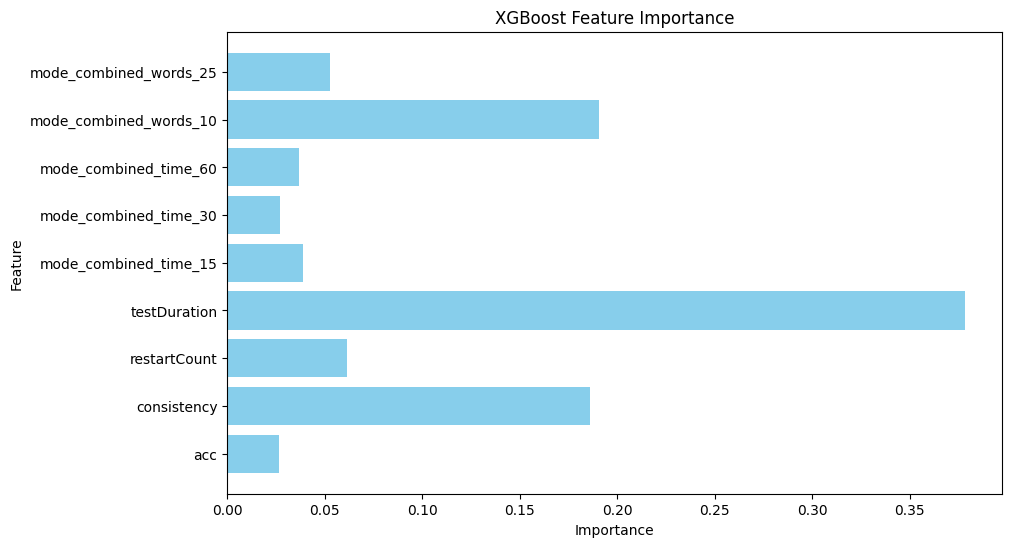

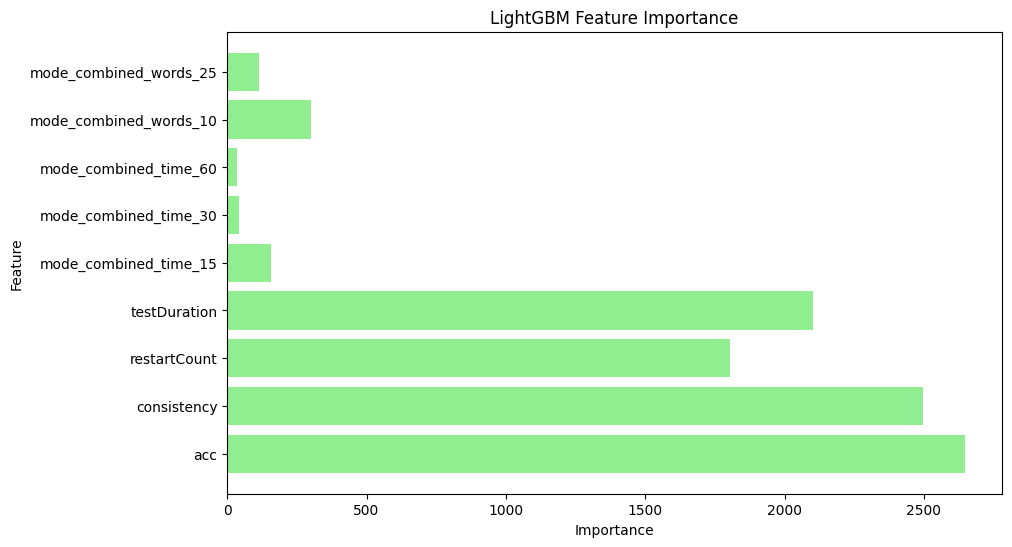

In [48]:
import matplotlib.pyplot as plt

# XGBoost Feature Importance
xgb_importance = xgb_model.feature_importances_
xgb_feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(xgb_feature_names, xgb_importance, color='skyblue')
plt.title('XGBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# LightGBM Feature Importance
lgb_importance = lgb_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(xgb_feature_names, lgb_importance, color='lightgreen')
plt.title('LightGBM Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

acc                       float64
consistency               float64
restartCount                int64
testDuration              float64
mode_combined_time_15       int64
mode_combined_time_30       int64
mode_combined_time_60       int64
mode_combined_words_10      int64
mode_combined_words_25      int64
dtype: object


 98%|===================| 2219/2262 [00:22<00:00]       

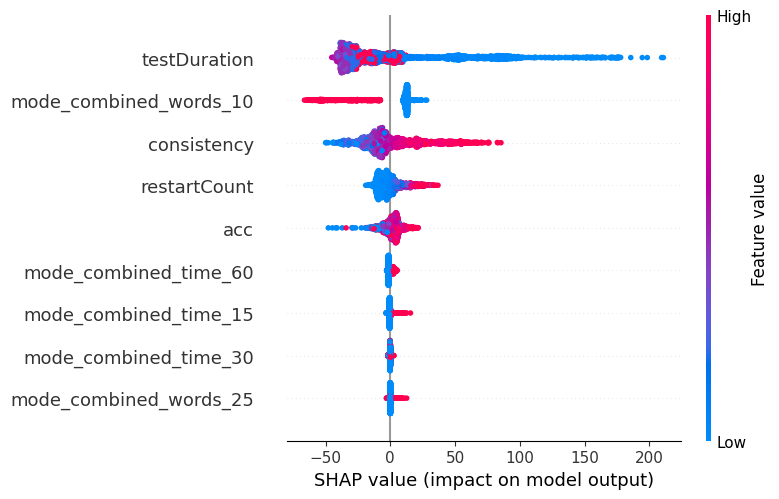

In [49]:
import pandas as pd
import shap
from sklearn.preprocessing import LabelEncoder

# 1. Convert boolean columns to numeric (True -> 1, False -> 0)
for column in X_test.select_dtypes(include=['bool']).columns:
    X_test[column] = X_test[column].astype(int)

# 2. Convert categorical columns to numeric using Label Encoding (for ordinal data)
for column in X_test.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    X_test[column] = label_encoder.fit_transform(X_test[column])

# 3. Convert all columns to numeric (if not already)
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# 4. Handle missing values (fill with mean for simplicity)
X_test = X_test.fillna(X_test.mean())

# Check the cleaned data types and ensure all are numeric
print(X_test.dtypes)

# SHAP for XGBoost
explainer = shap.Explainer(xgb_model, X_test)  # Replace xgb_model with your actual model
shap_values = explainer(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test)

### Domain - Specific Feature Engineering
- introduced a new metric stability_metric = testDuration / (1 + restartCount)
- However this doesn't improve the model performance

In [50]:
print(final_data.shape)

(11310, 10)


In [51]:
final_data['stability_metric'] = final_data['testDuration'] / (1 + final_data['restartCount'])

In [52]:
print(final_data.shape)

(11310, 11)


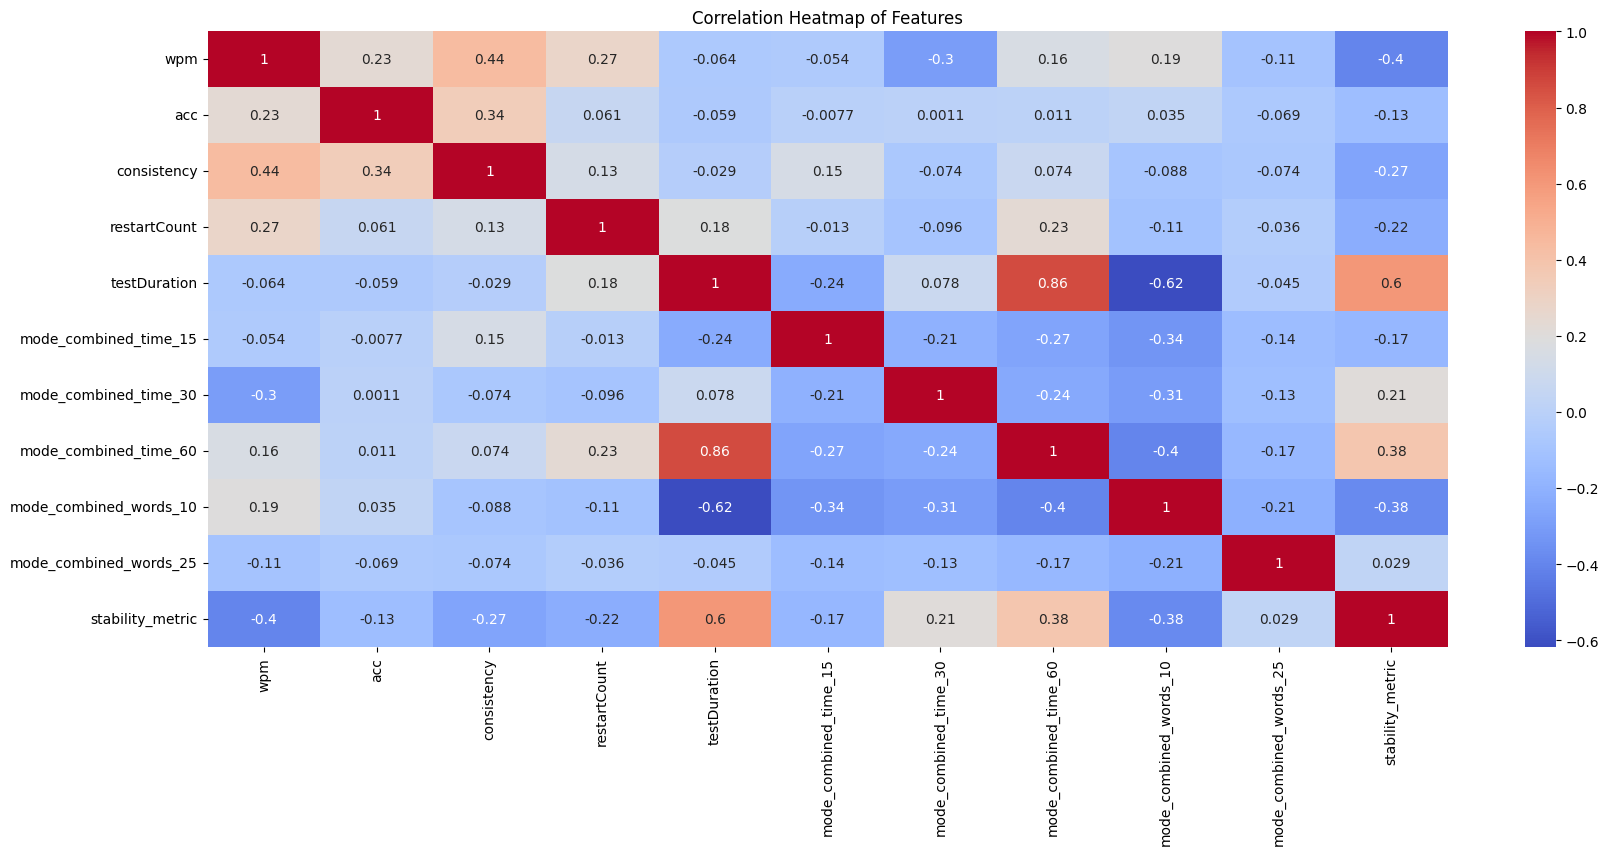

In [53]:
# Analyze correlation between numerical features
correlation_matrix = final_data.corr()

# Visualizing the correlation heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

In [54]:
X = final_data.drop(columns=['wpm'])
y = final_data['wpm']

# Split the Data: Divide the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_predictions = xgb.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_test, predictions):
    print("MAE:", mean_absolute_error(y_test, predictions))
    print("MSE:", mean_squared_error(y_test, predictions))
    print("R2 Score:", r2_score(y_test, predictions))

# Evaluating Linear Regression model
print(">>>>>>>>>>>Evaluating Linear Regression model<<<<<<<<<<<<<")
evaluate_model(y_test, lr_predictions)

# Evaluating Random Forest model
print(">>>>>>>>>>>Evaluating Random Forest model<<<<<<<<<<<<<")
evaluate_model(y_test, rf_predictions)

# Evaluating Decision Tree model
print(">>>>>>>>>>>Evaluating Decision Tree model<<<<<<<<<<<<<")
evaluate_model(y_test, dt_predictions)

# Evaluating XGBoost model
print(">>>>>>>>>>>Evaluating XGBoost model<<<<<<<<<<<<<")
evaluate_model(y_test, xgb_predictions)

from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
ada.fit(X_train, y_train)
evaluate_model(y_test, ada.predict(X_test))

from sklearn.ensemble import ExtraTreesRegressor

extra_trees = ExtraTreesRegressor(n_estimators=200, random_state=42)
extra_trees.fit(X_train, y_train)
evaluate_model(y_test, extra_trees.predict(X_test))

from catboost import CatBoostRegressor

catboost = CatBoostRegressor(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_state=42)
catboost.fit(X_train, y_train)
evaluate_model(y_test, catboost.predict(X_test))

>>>>>>>>>>>Evaluating Linear Regression model<<<<<<<<<<<<<
MAE: 30.543463092783384
MSE: 1807.12730224447
R2 Score: 0.42752668102583946
>>>>>>>>>>>Evaluating Random Forest model<<<<<<<<<<<<<
MAE: 13.144587925139994
MSE: 441.3706478074312
R2 Score: 0.8601797895841244
>>>>>>>>>>>Evaluating Decision Tree model<<<<<<<<<<<<<
MAE: 17.365610079575596
MSE: 770.3989527188329
R2 Score: 0.7559481034626612
>>>>>>>>>>>Evaluating XGBoost model<<<<<<<<<<<<<
MAE: 13.217475977323417
MSE: 437.90986827203346
R2 Score: 0.8612761174102861
MAE: 26.153663937695008
MSE: 1000.1696363667546
R2 Score: 0.6831598800167995
MAE: 13.01900637709991
MSE: 437.2126358720399
R2 Score: 0.8614969911393392
MAE: 13.060552032635517
MSE: 406.54145828264814
R2 Score: 0.8712132025039937


In [57]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f">>>>>>>>>>>Evaluating {model_name}<<<<<<<<<<<<<")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")
    print("\n")
    return mae, mse, r2

# Define base models
base_models = [
    ('extratrees', ExtraTreesRegressor(max_depth=20, min_samples_split=5, min_samples_leaf=1, n_estimators=200)),
    ('catboost', CatBoostRegressor(depth=8, iterations=200, learning_rate=0.1, verbose=0)),
    ('gradientboost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=42))
]

# Meta-model (Ridge for regression stacking)
stacking_model = StackingRegressor(estimators=base_models, final_estimator=Ridge(alpha=10))

# Fit stacking model
stacking_model.fit(X_train, y_train)

# Evaluate
evaluate_model(stacking_model, X_test, y_test, model_name="Stacking Regressor")


>>>>>>>>>>>Evaluating Stacking Regressor<<<<<<<<<<<<<
MAE: 12.640792754539655
MSE: 396.8733813755411
R2 Score: 0.8742759176033864




(12.640792754539655, 396.8733813755411, 0.8742759176033864)

In [58]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Step 1: Feature Engineering
def preprocess_features(X):
    # Polynomial Features
    poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
    X_poly = poly.fit_transform(X)

    # Standard Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_poly)

    return X_scaled, scaler, poly

# Preprocess training and testing data
X_train_processed, scaler, poly = preprocess_features(X_train)
X_test_processed = scaler.transform(poly.transform(X_test))

# Step 2: Neural Network Architecture
def build_advanced_model(input_dim):
    inputs = Input(shape=(input_dim,))

    # First block
    x = Dense(128, activation='relu', kernel_regularizer='l2')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Second block
    x = Dense(256, activation='relu', kernel_regularizer='l2')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    # Residual connection block
    residual = Dense(128, activation='relu', kernel_regularizer='l2')(x)
    residual = BatchNormalization()(residual)
    x = concatenate([x, residual])  # Residual connection
    x = Dropout(0.3)(x)

    # Third block
    x = Dense(128, activation='relu', kernel_regularizer='l2')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Output layer
    outputs = Dense(1, activation='linear')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mae'])
    return model

# Build the model
input_dim = X_train_processed.shape[1]
model = build_advanced_model(input_dim)

# Step 3: Training the Model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

history = model.fit(
    X_train_processed, y_train,
    validation_data=(X_test_processed, y_test),
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Step 4: Evaluate Performance
y_pred = model.predict(X_test_processed).flatten()  # Ensure predictions are 1-dimensional
y_test = y_test.values.flatten()  # Ensure y_test is 1-dimensional if it's a Pandas Series

# Calculate MAE and MSE
mae = np.mean(np.abs(y_test - y_pred))
mse = np.mean((y_test - y_pred) ** 2)
print(f"MAE: {mae}")
print(f"MSE: {mse}")

Epoch 1/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - loss: 110.1430 - mae: 104.9379 - val_loss: 103.2274 - val_mae: 99.7535 - learning_rate: 0.0010
Epoch 2/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 102.5216 - mae: 99.3150 - val_loss: 86.0898 - val_mae: 83.4524 - learning_rate: 0.0010
Epoch 3/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 82.3737 - mae: 79.8372 - val_loss: 54.9175 - val_mae: 52.5976 - learning_rate: 0.0010
Epoch 4/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 49.7977 - mae: 47.4963 - val_loss: 34.7615 - val_mae: 32.4260 - learning_rate: 0.0010
Epoch 5/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 27.1132 - mae: 24.7593 - val_loss: 25.2427 - val_mae: 22.8673 - learning_rate: 0.0010
Epoch 6/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 23.8744 - mae: 21.5014 - val_loss: 19.8317 - val_mae: 17.4954 - learning_rate: 0.0010
Epoch 7/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 21.6301 - mae: 19.3107 - val_loss: 17.4864 - va

In [59]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
import numpy as np

# Assuming X_train, X_test, y_train, y_test, and X_train_processed, X_test_processed are already defined

# Step 1: Train the Neural Network and Get Predictions
def build_advanced_model(input_dim):
    inputs = Input(shape=(input_dim,))

    # First block
    x = Dense(128, activation='relu', kernel_regularizer='l2')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Second block
    x = Dense(256, activation='relu', kernel_regularizer='l2')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    # Residual connection block
    residual = Dense(128, activation='relu', kernel_regularizer='l2')(x)
    residual = BatchNormalization()(residual)
    x = concatenate([x, residual])  # Residual connection
    x = Dropout(0.3)(x)

    # Third block
    x = Dense(128, activation='relu', kernel_regularizer='l2')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Output layer
    outputs = Dense(1, activation='linear')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mae', metrics=['mae'])
    return model

nn_model = build_advanced_model(X_train_processed.shape[1])
nn_model.fit(X_train_processed, y_train, epochs=50, batch_size=32, verbose=0)

# Get predictions from the neural network
nn_predictions_train = nn_model.predict(X_train_processed).flatten()
nn_predictions_test = nn_model.predict(X_test_processed).flatten()

# Step 2: Train Traditional Models (Optimized Versions)
catboost_model = CatBoostRegressor(
    depth=8, iterations=200, learning_rate=0.1, verbose=0, random_state=42
)
extratrees_model = ExtraTreesRegressor(
    max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42
)
gbr_model = GradientBoostingRegressor(
    learning_rate=0.1, max_depth=7, n_estimators=100, random_state=42
)

catboost_model.fit(X_train, y_train)
extratrees_model.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)

# Step 3: Create a dataset combining predictions from NN and the original features
X_train_stacking = np.column_stack([X_train, nn_predictions_train])
X_test_stacking = np.column_stack([X_test, nn_predictions_test])

# Step 4: Define and Train the Stacking Model
stacking_model = StackingRegressor(
    estimators=[
        ('catboost', catboost_model),
        ('extratrees', extratrees_model),
        ('gbr', gbr_model)
    ],
    final_estimator=Ridge(),
    passthrough=True  # Pass both original features and predictions to the final estimator
)

stacking_model.fit(X_train_stacking, y_train)

# Step 5: Evaluate Performance
stacking_predictions = stacking_model.predict(X_test_stacking)

mae = mean_absolute_error(y_test, stacking_predictions)
mse = mean_squared_error(y_test, stacking_predictions)
r2 = r2_score(y_test, stacking_predictions)

print(f">>>>>>>>>>>Evaluating Stacking Model<<<<<<<<<<<<<<")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")


283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
>>>>>>>>>>>Evaluating Stacking Model<<<<<<<<<<<<<<
MAE: 12.411010149176448
MSE: 395.7329084466225
R2 Score: 0.8746372038957286


In [60]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from catboost import CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor

# Define the optimized models
catboost_model = CatBoostRegressor(
    depth=8, iterations=200, learning_rate=0.1, verbose=0, random_state=42
)
extratrees_model = ExtraTreesRegressor(
    max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42
)
gbr_model = GradientBoostingRegressor(
    learning_rate=0.1, max_depth=5, n_estimators=200, random_state=42
)

# Train the models independently (optional)
catboost_model.fit(X_train, y_train)
extratrees_model.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)

# Predictions for debugging purposes (optional)
catboost_predictions = catboost_model.predict(X_test)
extratrees_predictions = extratrees_model.predict(X_test)
gbr_predictions = gbr_model.predict(X_test)

# Define the stacking model
stacking_model = StackingRegressor(
    estimators=[
        ('catboost', catboost_model),
        ('extratrees', extratrees_model),
        ('gbr', gbr_model)
    ],
    final_estimator=Ridge(),
    passthrough=True  # Pass original features to the meta-model
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Evaluate the stacking model
stacking_predictions = stacking_model.predict(X_test)

mae = mean_absolute_error(y_test, stacking_predictions)
mse = mean_squared_error(y_test, stacking_predictions)
r2 = r2_score(y_test, stacking_predictions)

print(f">>>>>>>>>>>Evaluating Stacking Model<<<<<<<<<<<<<<")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2 Score: {r2}")


>>>>>>>>>>>Evaluating Stacking Model<<<<<<<<<<<<<<
MAE: 12.662069472416647
MSE: 396.86180488787124
R2 Score: 0.8742795848770257
